# Lesson I

## Limits of simple Regression

In this chapter we'll get farther into regression, including multiple regression and logistic regression. But first let's understand the limits of simple regression.

In a previous exercise, we made a scatter plot of vegetable consumption as a function of income, and plotted a line of best fit.

Here's what it looks like:

<img src='pictures/incomevegetables.jpg' />

The slope of the line is **0.07**, which means that the difference between the lowest and highest income brackets is about **0.49** servings per day.

It was an arbitrary choice to plot vegetables as a function of income. We could've plotted it the other way around, like this:

<img src='pictures/vegetablesincome.jpg' />

The slope of this line is **0.23**, which means that the difference between 0 and 8 servings per day is about 2 income codes, roughly from 5 to 7. If we check the codebook, income of 5 is : $30,000 per year and code 7 is : $65,000. 

So if we use vegetable consumption to predict income, we see a big difference. But when we used income to predict vegetable consumption, we saw a small difference.

This example shows that ***regression is not symmetric***; the regression of A onto B is not same as the regression of B onto A.

We can see that more clearly by putting two figures side by side and plotting both regression lines on both figures:

<img src='pictures/notsymmetric.jpg' />

* On the Left, we treat income as a known quantity and vegetable consumption as random.
* On the right, vegetable consumption is known and income is random.

This example meant to demonstrate another point, which is that ***regression doesn't tell you much about cousation.***

If you think people with lower income can't afford vegetables, we might look at the figure on the left and conclude that it doesn't make much difference.

If you think better diet increases income, the figure on the right might make you think it does.

But in general, regression can't tell you what causes what.

However, we have tools for teasing apart relationships amon multiple variables; one of the most important is ***multiple regression***. ``Scipy`` *doesn't* do multiple regression, so we have to use a different library, ``StatsModels``

Here's the import statement and how to use it:

```python
    import statsmodels.formula.api as smf
    results = smf.ols('INCOME2 ~ _VEGESU1', data=brfss).fit()
    results.params

    # Output:
    '''
    Intercept   5.399903
    _VEGESU1    0.232515
    dtype: float64
    '''
```

``ols`` stants for : **"Ordinary least Squares"**, another name for regression.

* First argument: formula string that specifies that we want to regress income asa function of vegetable consumption.
* Second argument: BRFSS DataFrame

The result from ``ols()`` represents the model; we have to run ``.fit()`` to get the results.

The results object containt a lot of information, but first thing we'll look at the ``.params``, Which contains;
* Estimated slope and intercept

## Exercise

### Using StatsModels

Let's run the same regression using ``SciPy`` and ``StatsModels`` and confirm we get the same results.

In [5]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.formula.api as smf

# BRFSS DataFRame
brfss = pd.read_hdf('datasets/brfss.hdf5', 'brfss')
# GSS DataFrame
gss = pd.read_hdf('datasets/gss.hdf5', 'gss')

In [3]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run Regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105006, intercept=1.5287786243363113, rvalue=0.11967005884864092, pvalue=1.378503916249654e-238, stderr=0.0021109763563323305, intercept_stderr=0.013196467544093591)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


# Lesson II

## Multiple Regression

We'll use data from the General Social Survey from chapter 2, and we'll explore variables that are related to income.

In [6]:
# Regression of real income as a function of years of education.
results = smf.ols('realinc ~ educ', data=gss).fit()
# realinc is the variable we are trying to predict.
# educ is the variable we are using to inform the predictions.
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

Estimated slope is : **3586**, which means:
***each additional year of education is associated with an increase of almost $3600 of income.***

Income also depens on age, so it would be good to include that in the model, too.

In [7]:
# Adding Age
results = smf.ols('realinc ~ educ + age', data=gss).fit()
# We can list as many variables as we like
# '+' sign : indicates that we expect the contributions of the two variables to be additive.
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

Estimated slope : **3655**, little bit higher than the previous model
estimated slope for age : **$80**, which is small!

To see what's going on, let's look more closely at the relationships between income and age. We'll use ``groupby()`` in this case.

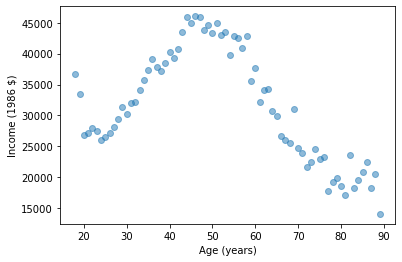

In [8]:
# Grouped by age
grouped = gss.groupby('age')

# Calculate the mean of income by age
mean_income_by_age = grouped['realinc'].mean()

# Plot the data
plt.plot(mean_income_by_age, 'o', alpha=0.5)

# Label the Axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

# Show plot
plt.show()

Average income increases from age 20 to 50, then starts to fall. This explains why the estimated slope is so small, 'Cause relationship is **non-linear**.

***Correlation and simple regression can't measure non-linear relationships. But multiple regression can!***

To describe a non-linear relationship, one option is to add a new variable that is a non-linear combination of other variables.

In [9]:
# We'll create a new variable called age2 that equals age squared.
gss['age2'] = gss['age']**2

# Now we can run a regression with both 'age' and 'age2'
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()

results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

The slope associated with age is : **$1700**
Slope associated with age2 is : **-17**

In the next lesson we'll see methods to visualize regression results.

## Exercise

### Plot income and education

To get a closer look at the relationship between income and education. Use the variable ``educ`` to group the data, then plot the mean income in each group.

In [ ]:
# Group by educ
grouped = gss['educ']

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.clf()
plt.scatter(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')

# Show plot
plt.show()

In [23]:
# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and  age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the results
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64